In [1]:
from datetime import datetime as dt
import pandas as pd
import pandas_ta as ta
import numpy as np
import torch

In [2]:
df = pd.read_csv("/Users/stevenwinatamulia/Documents/Skripsi-1/Documents/skripsi/ETHUSDT-4h-2020-2024.csv",delimiter=';')

In [3]:
#change timestamp into datetime
def timestamp_to_datetime(timestamp:list)->list:
    datetime = []
    for i in timestamp:
        datetime.append(dt.fromtimestamp(int(i)/1000))
    return datetime

df['open_time'] = timestamp_to_datetime(df['open_time'])
df['close_time'] = timestamp_to_datetime(df['close_time'])
df.index=df['open_time']

# feature engineering

In [4]:
df.columns

Index(['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_volume', 'count', 'taker_buy_volume', 'taker_buy_quote_volume',
       'ignore'],
      dtype='object')

In [5]:
df['SMA_50'] = ta.sma(df['close'], 50)
df['RSI_14'] = ta.rsi(df['close'], 14)
df['RSI_21'] = ta.rsi(df['close'],21)
df['EMA_20'] = ta.ema(df['close'], 20)
df['EMA_34'] = ta.ema(df['close'], 34)
df = df.join(ta.bbands(df['close'], length=20, std=2))
df = df.join(ta.macd(df['close'], fast=12, slow=26, signal=9))
#df['BB_upper'], df['BB_middle'], df['BB_lower'] = ta.bbands(df['close'], length=20, std=2)
#df['MACD'], df['MACD_signal'], df['MACD_hist'] = ta.macd(df['close'], fast=12, slow=26, signal=9)

In [6]:
df['SMA_50'] = ta.sma(df['close'], 50)
df['RSI_14'] = ta.rsi(df['close'], 14)
df['RSI_21'] = ta.rsi(df['close'],21)
df['EMA_20'] = ta.ema(df['close'], 20)
df['EMA_34'] = ta.ema(df['close'], 34)
#df['BB_upper'], df['BB_middle'], df['BB_lower'] = ta.bbands(df['close'], length=20, std=2)
# df['MACD'], df['MACD_signal'], df['MACD_hist'] = ta.macd(df['close'], fast=12, slow=26, signal=9)
df_fix = df[[ 'open', 'high', 'low', 'close', 'volume','SMA_50', 'RSI_14', 'EMA_20','RSI_21','EMA_34']]

In [7]:
ta.bbands(df['close'], length=31, std=2)

,BBL_31_2.0,BBM_31_2.0,BBU_31_2.0,BBB_31_2.0,BBP_31_2.0
open_time,,,,,
2020-01-01 07:00:00,NaN,NaN,NaN,NaN,NaN
2020-01-01 11:00:00,NaN,NaN,NaN,NaN,NaN
2020-01-01 15:00:00,NaN,NaN,NaN,NaN,NaN
2020-01-01 19:00:00,NaN,NaN,NaN,NaN,NaN
2020-01-01 23:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-09-30 11:00:00,2584.613009,2647.771935,2710.930862,4.770723,0.412349
2024-09-30 15:00:00,2585.221383,2648.014839,2710.808294,4.742682,0.340391
2024-09-30 19:00:00,2581.890137,2647.006452,2712.122766,4.919997,0.101049


In [8]:
import numpy as np

In [9]:
log_ret = pd.DataFrame()
log_ret['ret_close'] = np.log(df_fix.close) - np.log(df_fix.close.shift(1))
log_ret['sma50'] = df_fix['SMA_50']
log_ret['rsi14'] = df_fix['RSI_14']
log_ret['ema20'] = df_fix['EMA_20']
log_ret['rsi21'] = df_fix['RSI_21']
log_ret['ema34'] = df_fix['EMA_34']
log_ret = log_ret.join(ta.bbands(df['close'], length=30, std=2))
log_ret = log_ret.join(ta.bbands(df['close'], length=31, std=2))
log_ret = log_ret.join(ta.macd(df['close'], fast=12, slow=26, signal=9))
log_ret = log_ret.dropna()

In [10]:
log_ret.corr(method='spearman').iloc[0].shape[0]

19

In [11]:
log_ret.corr(method='spearman').iloc[0]

ret_close        1.000000
sma50           -0.028847
rsi14            0.298451
ema20           -0.026924
rsi21            0.242974
ema34           -0.027870
BBL_30_2.0      -0.028151
BBM_30_2.0      -0.028307
BBU_30_2.0      -0.028107
BBB_30_2.0       0.018476
BBP_30_2.0       0.299018
BBL_31_2.0      -0.028132
BBM_31_2.0      -0.028291
BBU_31_2.0      -0.028164
BBB_31_2.0       0.017872
BBP_31_2.0       0.293958
MACD_12_26_9     0.048334
MACDh_12_26_9    0.125265
MACDs_12_26_9    0.009885
Name: ret_close, dtype: float64

In [12]:
correlation = []
for i in range(log_ret.corr(method='spearman').iloc[0].shape[0]):
    if np.abs(log_ret.corr(method='spearman').iloc[0][i]) >=0.1:
        correlation.append(i)
        print(i)

/var/folders/_8/r2326rms4l37yskjs2yv3mv80000gn/T/ipykernel_5557/2321901921.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.abs(log_ret.corr(method='spearman').iloc[0][i]) >=0.1:


0
2
4
10
15
17


In [13]:
col_name = log_ret.corr(method='spearman').iloc[0][correlation].index
col_name

/var/folders/_8/r2326rms4l37yskjs2yv3mv80000gn/T/ipykernel_5557/579759620.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  col_name = log_ret.corr(method='spearman').iloc[0][correlation].index


Index(['ret_close', 'rsi14', 'rsi21', 'BBP_30_2.0', 'BBP_31_2.0',
       'MACDh_12_26_9'],
      dtype='object')

# Data Fix (after cleaning and engineering)

In [14]:
XY_data = log_ret[col_name]
XY_data.head()

,ret_close,rsi14,rsi21,BBP_30_2.0,BBP_31_2.0,MACDh_12_26_9
open_time,,,,,,
2020-01-09 11:00:00,-0.000143,50.827852,53.502023,0.533342,0.545253,-0.758915
2020-01-09 15:00:00,-0.012225,46.592383,50.203579,0.395587,0.412719,-0.859642
2020-01-09 19:00:00,-0.000651,46.372073,50.032115,0.368387,0.390964,-0.900565
2020-01-09 23:00:00,-0.004281,44.874082,48.882925,0.298975,0.325386,-0.931715
2020-01-10 03:00:00,0.001453,45.516591,49.297440,0.293984,0.320568,-0.902566


In [15]:
XY_data.shape

(10338, 6)

In [16]:
XY_data.corr()

,ret_close,rsi14,rsi21,BBP_30_2.0,BBP_31_2.0,MACDh_12_26_9
ret_close,1.000000,0.330811,0.279739,0.342928,0.337632,0.154010
rsi14,0.330811,1.000000,0.977887,0.937837,0.940638,0.499070
rsi21,0.279739,0.977887,1.000000,0.879963,0.886131,0.393082
BBP_30_2.0,0.342928,0.937837,0.879963,1.000000,0.999105,0.549837
BBP_31_2.0,0.337632,0.940638,0.886131,0.999105,1.000000,0.542351
MACDh_12_26_9,0.154010,0.499070,0.393082,0.549837,0.542351,1.000000


In [17]:
XY_data['y'] = XY_data['ret_close'].shift(-1)
XY_data.tail()

/var/folders/_8/r2326rms4l37yskjs2yv3mv80000gn/T/ipykernel_5557/2773508375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XY_data['y'] = XY_data['ret_close'].shift(-1)


,ret_close,rsi14,rsi21,BBP_30_2.0,BBP_31_2.0,MACDh_12_26_9,y
open_time,,,,,,,
2024-09-30 11:00:00,0.003062,46.236617,50.622382,0.405491,0.412349,-6.855071,-0.003316
2024-09-30 15:00:00,-0.003316,43.949577,49.088132,0.336007,0.340391,-7.393437,-0.012606
2024-09-30 19:00:00,-0.012606,36.598073,43.828611,0.080785,0.101049,-9.526301,-0.000216
2024-09-30 23:00:00,-0.000216,36.486268,43.744894,0.044491,0.101339,-10.459905,0.002694
2024-10-01 03:00:00,0.002694,38.995063,45.120723,0.074759,0.124045,-10.086594,NaN


# very fix data

XY_data

In [18]:
# XY_data.to_csv('data_skripsi.csv')

bawahnya gw ilangin karena gaada y lagi (run out of y) -> log ret udah gada lagi.

In [19]:
XY_data.index = df.open_time.iloc[10387-10338:]

In [20]:
dataX = XY_data.iloc[:-1,:-1]
dataY = XY_data.iloc[5:-1,-1]
dataX.shape

(10337, 6)

In [21]:
dataY.shape

(10332,)

## Setting the Training and Testing Data

In [22]:
X_train = dataX[:7749].values.astype('float32')
y_train = dataY[:7749-6].values.astype('float32')
print(X_train.shape,y_train.shape)

(7749, 6) (7743,)


In [23]:
X_train_modified = []

for i in range(len(X_train)-6):
    X_train_modified.append(X_train[i:i+6])

In [24]:
X_train_tensor = torch.from_numpy(np.array(X_train_modified))
y_train_tensor = torch.from_numpy(y_train).view(-1, 1) 

In [25]:
X_train_tensor.shape

torch.Size([7743, 6, 6])

In [26]:
y_train_tensor.shape

torch.Size([7743, 1])

In [27]:
X_test = dataX[7749:].values.astype('float32')
y_test = dataY[7749:].values.astype('float32')
print(X_test.shape,y_test.shape)

(2588, 6) (2583,)


In [28]:
X_test_modified = []

for i in range(len(X_test)-5):
    X_test_modified.append(X_test[i:i+6])

In [29]:
X_test_tensor = torch.from_numpy(np.array(X_test_modified))
y_test_tensor = torch.from_numpy(y_test).view(-1, 1) 

In [30]:
print(X_test_tensor.shape,y_test_tensor.shape)

torch.Size([2583, 6, 6]) torch.Size([2583, 1])


In [31]:
X_train_check = dataX[:7749]#.values.astype('float32')
y_train_check = dataY[:7749-5]#.values.astype('float32')
X_test_check = dataX[7749:]#.values.astype('float32')
y_test_check = dataY[7749:]#.values.astype('float32')

In [32]:
X_test_check

,ret_close,rsi14,rsi21,BBP_30_2.0,BBP_31_2.0,MACDh_12_26_9
open_time,,,,,,
2023-07-27 19:00:00,-0.004429,50.069085,48.036260,0.568400,0.550972,3.240137
2023-07-27 23:00:00,-0.004174,45.110592,45.060578,0.425759,0.413731,2.234370
2023-07-28 03:00:00,0.000188,45.372689,45.220869,0.436982,0.434348,1.542062
2023-07-28 07:00:00,0.000935,46.734407,46.042634,0.478325,0.474318,1.167708
2023-07-28 11:00:00,-0.001876,44.346604,44.632536,0.414059,0.405847,0.675838
...,...,...,...,...,...,...
2024-09-30 07:00:00,-0.010468,43.726106,49.227030,0.347818,0.345992,-6.469585
2024-09-30 11:00:00,0.003062,46.236617,50.622382,0.405491,0.412349,-6.855071
2024-09-30 15:00:00,-0.003316,43.949577,49.088132,0.336007,0.340391,-7.393437


# Setting Batch Size

In [33]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [34]:
train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
test_dataset = CustomDataset(X_test_tensor, y_test_tensor)

In [35]:
batch_size = 16  # You can adjust this based on your needs

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Setting Models

In [36]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

In [37]:
class GRUModel(nn.Module):
    def __init__(self, input_size=X_train_tensor.shape[-1], hidden_size_1=64, hidden_size_2=32, hidden_size_3=16, output_size=1):
        super(GRUModel, self).__init__()
        
        # First GRU layer
        self.layer1 = nn.GRU(input_size=input_size, 
                          hidden_size=hidden_size_1,
                          batch_first=True)
        
        # Second GRU layer
        self.layer2 = nn.GRU(input_size=hidden_size_1,
                          hidden_size=hidden_size_2,
                          batch_first=True)
        
        # Third GRU layer
        self.layer3 = nn.GRU(input_size=hidden_size_2,
                          hidden_size=hidden_size_3,
                          batch_first=True)
        
        # Final linear layer
        self.fc = nn.Linear(hidden_size_3, output_size)
        
    def forward(self, x):
        # Reshape input if it's not in the right format
        if len(x.shape) == 2:
            x = x.unsqueeze(1)  # Add sequence length dimension
            
        # First GRU layer
        out, _ = self.layer1(x)
        
        # Second GRU layer
        out, _ = self.layer2(out)
        
        # Third GRU layer
        out, _ = self.layer3(out)
        
        # Take the last output and pass through final linear layer
        out = self.fc(out[:, -1, :])
        
        return out

In [38]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = GRUModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
# list(model_0.parameters())

### Setting Loss Function and Optimizer for NN training

In [39]:
# Create the loss function
loss_fn = nn.MSELoss()


# Create the optimizer
optimizer = torch.optim.Adam(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.000001)

In [40]:
import time

In [ ]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 50

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

epoch_start_time = time.time()  # Start time for total training

for epoch in range(1,epochs+1):
    ### Training
    model_0.train()  # Put model in training mode
    train_loss = 0  # Track total training loss for the epoch
    iteration = 0
    # Iterate over batches in the training DataLoader
    for X_batch, y_batch in train_loader:
        # 1. Forward pass on train data
        y_pred = model_0(X_batch)

        # 2. Calculate the loss
        loss = loss_fn(y_pred, y_batch)

        # 3. Zero grad of the optimizer clears the gradients of all optimized tensors.
        optimizer.zero_grad()

        # 4. Loss backwards
        # This function computes the gradients of the loss with respect to the model parameters using backpropagation.
        loss.backward()

        # 5. Progress the optimizer
        
        optimizer.step()

        # Accumulate the training loss for the epoch
        train_loss += loss.item()

    # Calculate average training loss for the epoch
    train_loss /= len(train_loader)

    ### Testing
    model_0.eval()  # Put the model in evaluation mode
    y_preds = []
    test_loss = 0  # Track total testing loss for the epoch

    with torch.inference_mode():
        # Iterate over batches in the test DataLoader
        for X_batch, y_batch in test_loader:
            # 1. Forward pass on test data
            test_pred = model_0(X_batch)

            # 2. Calculate loss on test data
            test_loss += loss_fn(test_pred, y_batch).item()

        # Calculate average testing loss for the epoch
        test_loss /= len(test_loader)
    
    epoch_time = time.time() - epoch_start_time

    # Print out what's happening
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(train_loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch:.6f} | MSE Train Loss: {train_loss:.6f} | MSE Test Loss: {test_loss}")

# total_time = time.time() - epoch_start_time
# print(f"\nTotal training time: {total_time:.2f} seconds, batch size is {batch_size} and epoch is {epochs}")

Epoch: 10.000000 | MSE Train Loss: 0.001034 | MSE Test Loss: 0.0006496862035958286
Epoch: 20.000000 | MSE Train Loss: 0.000533 | MSE Test Loss: 0.00023564849419208147


In [ ]:
# Make predictions
model_0.eval()
y_train_preds = []

with torch.inference_mode():
    for X_batch, _ in train_loader:
        y_pred = model_0(X_batch)
        y_train_preds.append(y_pred)

# Concatenate all predictions into a single tensor
y_train_preds = torch.cat(y_train_preds)

print("Predictions shape:", y_train_preds.shape)  # Should be (2583, 1)

In [ ]:
# Make predictions
model_0.eval()
y_preds = []

with torch.inference_mode():
    for X_batch, _ in test_loader:
        y_pred = model_0(X_batch)
        y_preds.append(y_pred)

# Concatenate all predictions into a single tensor
y_preds = torch.cat(y_preds)

print("Predictions shape:", y_preds.shape)  # Should be (2583, 1)

In [ ]:
print(y_preds)

In [ ]:
prediction_train_np = y_train_preds.numpy()
prediction_train_np.shape

In [ ]:
prediction_np = y_preds.numpy()
prediction_np.shape

In [ ]:
# model train vs test
y_train_np = y_train.reshape(prediction_train_np.shape[0],1)
y_test_np = y_test.reshape(prediction_np.shape[0],1)

In [ ]:
import matplotlib.pyplot as plt

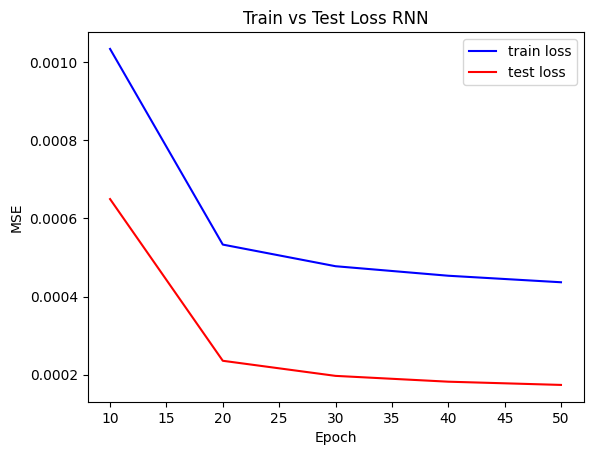

In [81]:
epoch_list = list(range(10,epochs+1,10))

plt.plot(epoch_list,train_loss_values,label='train loss',color='blue')
plt.plot(epoch_list,test_loss_values,label='test loss',color = 'red')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Train vs Test Loss RNN')

plt.legend()

plt.show()

# Combining return and data

## training data

In [ ]:
close_train =  df.loc[X_train_check.iloc[6:].index].close.values

In [ ]:
close_train_t1 = df.loc[X_train_check.iloc[5:-1].index].close.values
close_train_prediction = np.log(close_train_t1)+prediction_train_np.reshape(7743)
predicted_price_train = np.exp(close_train_prediction)

In [ ]:
predicted_price_train.shape

In [ ]:
close_real = df.loc[df.open_time>='2023-7-28 19:00'].close.values # real data
print(close_real)
close_real.shape

In [ ]:
# first y_hat that we get is to predicting return 
close_pred = np.log(df.loc[df.open_time>='2023-7-28 15:00'].close.values[:-1])
close_pred_logged = close_pred.reshape(close_pred.shape[0],1) + prediction_np

In [ ]:
close_hat = np.exp(close_pred_logged)
close_hat.shape

In [ ]:
prediction_np.shape

In [ ]:
y_test.shape[0]

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape

# return error

## train data price error

In [ ]:
mse(predicted_price_train,close_train)

In [ ]:
rmse(predicted_price_train,close_train)

In [ ]:
mae(predicted_price_train,close_train)

In [ ]:
mape(predicted_price_train,close_train)

## train data return error

In [ ]:
mse(prediction_train_np,y_train)

In [ ]:
rmse(prediction_train_np,y_train)

In [ ]:
mae(prediction_train_np,y_train)

In [ ]:
mape(prediction_train_np,y_train)

## test data

In [ ]:
mse(prediction_np,y_test)

In [ ]:
rmse(prediction_np,y_test)

In [ ]:
mae(prediction_np,y_test)

In [ ]:
mape(prediction_np,y_test)

In [ ]:
XY_data

# Plotting

In [ ]:
train_date = X_train_check.iloc[6:].index
test_date = XY_data.index[XY_data.index>='2023-7-28 19:00']

In [ ]:
combined_date = np.concatenate((train_date,test_date))
combined_return_pred = np.concatenate((prediction_train_np,prediction_np))
combined_return_real = np.concatenate((y_train,y_test))

In [ ]:
plt.plot(combined_date,combined_return_real, label = 'real',color='blue')

plt.plot(combined_date,combined_return_pred,label = 'prediction',color='red')
plt.axvline(test_date[0],color='green', linestyle='--', label='Start of Test Data')

plt.xlabel(
    'Time'
)
plt.ylabel('Log Return')
# plt.plot(y_test, label = 'real')
plt.title("Prediction vs Real Return ETH RNN")
plt.legend()
plt.show()

# price error

In [ ]:
mse(close_real,close_hat)

In [ ]:
rmse(close_real,close_hat)

In [ ]:
mae(close_real,close_hat)

In [ ]:
mape(close_real,close_hat)

In [ ]:
combined_price_prediction = np.concatenate((predicted_price_train,close_hat.reshape(2583)))
combined_real_price = np.concatenate((close_train,close_real))

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(combined_date,combined_real_price, label = 'real',color='blue')

plt.plot(combined_date,combined_price_prediction,label = 'prediction',color='red')
plt.axvline(test_date[0],color='green', linestyle='--', label='Start of Test Data')

plt.xlabel(
    'Time'
)
plt.ylabel('Log Return')
# plt.plot(y_test, label = 'real')
plt.title("Prediction vs Real Price ETH RNN")
plt.legend()
plt.show()